In [1]:
import math

import matplotlib.pyplot as plt
import gradio as gr
import numpy as np

from utils import read_and_parse

C:\Users\ricar\PycharmProjects\Automatization\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Importing numpy...
Time elapsed to import numpy: 9.00006853044033e-06
Importing pandas...
Time elapsed to import pandas: 4.600035026669502e-06
Importing os...
Time elapsed to import os: 2.00001522898674e-06


In [2]:
def view_image(pixels: np.ndarray):
    plt.imshow(pixels.astype(np.uint8))
    plt.show()
    
def down_sample(pixels: np.ndarray, d: int) -> np.ndarray:
    return pixels[::d, ::d].astype(np.uint8)

In [34]:
xs, ys = read_and_parse('osu', 16)

Time elapsed to run check_path_exists: 0.000659500015899539
Time elapsed to run read_and_parse: 0.6014449000358582


In [35]:
xs[0].shape, ys[0]

((68, 120, 3), array([53., 25.,  1.], dtype=float32))

In [36]:
xs.shape = (len(xs), -1)

In [48]:
mb=xs.nbytes // 1024 // 1024
print(f'{mb} MB')

5 MB


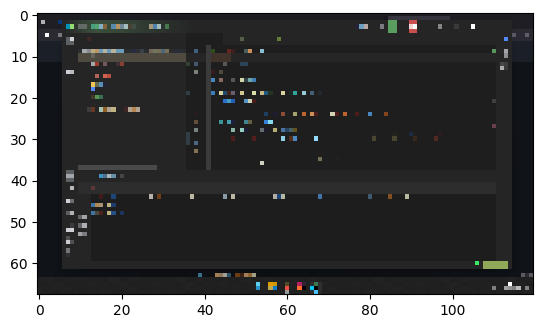

In [11]:
view_image(xs[0])

In [20]:
down_sampling = 1

def get_image(number: int) -> np.ndarray:
    img = down_sample(xs[number], down_sampling)
    print(img.shape)
    return img

demo = gr.Interface(
    get_image,
    inputs=gr.Slider(0, len(xs) - 1, step=1),
    outputs=gr.Image()
)

demo.launch()

Running on local URL:  http://127.0.0.1:7868

To create a public link, set `share=True` in `launch()`.


In [12]:
img = down_sample(xs[0], 1)

In [13]:
x, y, action = ys[0]

In [14]:
img[int(y), int(x)]

array([30, 30, 30], dtype=uint8)

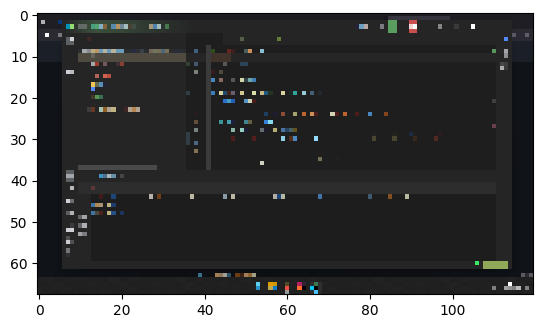

In [17]:
view_image(img)

In [15]:
dimg = down_sample(img, 8)

In [16]:
dimg[int(y)//8, int(x)//8]

array([30, 30, 30], dtype=uint8)

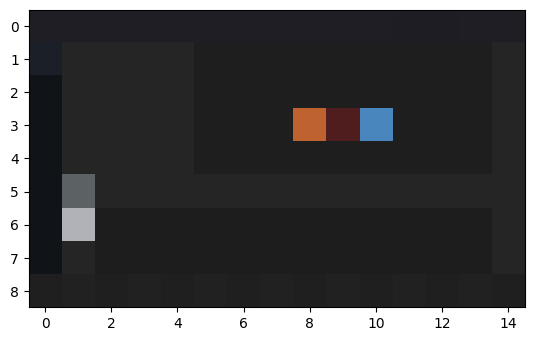

In [18]:
view_image(dimg)